In [2]:
# handle imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier


In [4]:
# import data
subject = pd.read_csv('./subject_score.csv')
task = pd.read_csv('./task_score.csv')
accelerometer = pd.read_csv('./accelerometer.csv')
print(task.head())


   Unnamed: 0  Drnkg  Drwg  Fldg  FtnL  FtnR  NtsBts  RamL  RamR  Sheets  \
0           0    1.0   1.0   1.0   1.0   1.0     1.0   2.0   1.0     2.0   
1           1    1.0   1.0   0.0   1.0   0.0     1.0   1.0   0.0     0.0   
2           2    0.0   0.0   0.0   1.0   0.0     1.0   0.0   0.0     0.0   
3           3    0.0   0.0   0.0   1.0   0.0     1.0   1.0   0.0     0.0   
4           4    0.0   0.0   0.0   0.0   0.0     1.0   1.0   0.0     0.0   

   Sitng  SitStand  Stndg  Typg  Wlkg  WlkgCnt  
0    NaN       0.0    0.0   2.0   1.0      1.0  
1    NaN       0.0    0.0   0.0   1.0      1.0  
2    NaN       0.0    0.0   0.0   0.0      0.0  
3    NaN       0.0    0.0   0.0   0.0      0.0  
4    NaN       0.0    0.0   0.0   0.0      0.0  


In [1]:
# get walking and gait data
walking = task['Wlkg'].values.reshape(-1,1)
gait = subject['Gait'].values.reshape(-1,1)

print(walking.head())
# get training and testing data
wlk_train, wlk_test, gait_train, gait_test = train_test_split(walking, gait, test_size = 0.2, random_state=0, stratify=gait)

# create tree
walking_clf = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
walking_clf.fit(wlk_train, gait_train)

# accuracy of fitting training data
train_accuracy = walking_clf.score(wlk_train,gait_train)
test_accuracy = walking_clf.score(wlk_test,gait_test)

print('train accuracy:', train_accuracy)
print('test accuracy:', test_accuracy)


NameError: name 'task' is not defined

[Text(0.3333333333333333, 0.875, 'x[0] <= 0.5\ngini = 0.654\nsamples = 107\nvalue = [41, 45, 15, 6]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.299\nsamples = 45\nvalue = [37, 7, 1, 0]'),
 Text(0.5, 0.625, 'x[0] <= 1.5\ngini = 0.56\nsamples = 62\nvalue = [4, 38, 14, 6]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.25\nsamples = 43\nvalue = [4, 37, 1, 1]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 2.5\ngini = 0.46\nsamples = 19\nvalue = [0, 1, 13, 5]'),
 Text(0.5, 0.125, 'gini = 0.32\nsamples = 16\nvalue = [0, 1, 13, 2]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3]')]

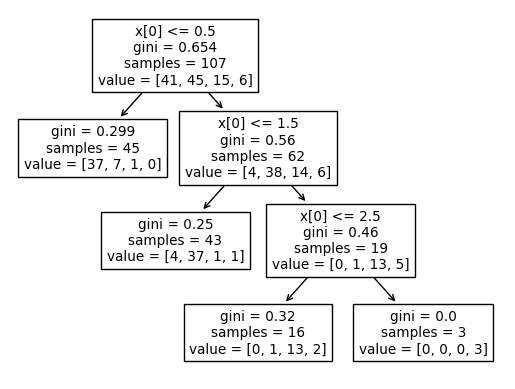

In [8]:
# visualize tree
tree.plot_tree(walking_clf)

In [9]:
# scale walking data
scaler = StandardScaler()
wlk_train_scaled = scaler.fit_transform(wlk_train)
wlk_test_scaled = scaler.transform(wlk_test)

# fit scaled tree
walking_clf.fit(wlk_train_scaled, gait_train)

# accuracy of fitting training data
train_accuracy = walking_clf.score(wlk_train,gait_train)
test_accuracy = walking_clf.score(wlk_test,gait_test)

print('train accuracy:', train_accuracy)
print('test accuracy:', test_accuracy)

train accuracy: 0.22429906542056074
test accuracy: 0.2962962962962963


[Text(0.3333333333333333, 0.875, 'x[0] <= -0.357\ngini = 0.654\nsamples = 107\nvalue = [41, 45, 15, 6]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.299\nsamples = 45\nvalue = [37, 7, 1, 0]'),
 Text(0.5, 0.625, 'x[0] <= 0.896\ngini = 0.56\nsamples = 62\nvalue = [4, 38, 14, 6]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.25\nsamples = 43\nvalue = [4, 37, 1, 1]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 2.15\ngini = 0.46\nsamples = 19\nvalue = [0, 1, 13, 5]'),
 Text(0.5, 0.125, 'gini = 0.32\nsamples = 16\nvalue = [0, 1, 13, 2]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3]')]

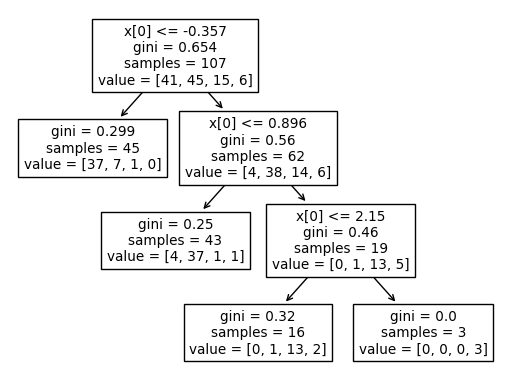

In [11]:
# plot tree
tree.plot_tree(walking_clf)

In [12]:
# convert to categorical data
encode = OneHotEncoder()
wlk_cat = encode.fit_transform(walking)
wlk_cat_train, wlk_cat_test, gait_cat_train, gait_cat_test = train_test_split(wlk_cat, gait, test_size = 0.2, random_state=0, stratify=gait)

# fit tree
walking_clf.fit(wlk_cat_train, gait_cat_train)

# accuracy of fitting training data
train_accuracy = walking_clf.score(wlk_cat_train,gait_cat_train)
test_accuracy = walking_clf.score(wlk_cat_test,gait_cat_test)

print('train accuracy:', round(train_accuracy, 3))
print('test accuracy:', round(test_accuracy, 3))

train accuracy: 0.841
test accuracy: 0.815


[Text(0.6666666666666666, 0.875, 'x[0] <= 0.5\ngini = 0.654\nsamples = 107\nvalue = [41, 45, 15, 6]'),
 Text(0.5, 0.625, 'x[1] <= 0.5\ngini = 0.56\nsamples = 62\nvalue = [4, 38, 14, 6]'),
 Text(0.3333333333333333, 0.375, 'x[3] <= 0.5\ngini = 0.46\nsamples = 19\nvalue = [0, 1, 13, 5]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.32\nsamples = 16\nvalue = [0, 1, 13, 2]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.25\nsamples = 43\nvalue = [4, 37, 1, 1]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.299\nsamples = 45\nvalue = [37, 7, 1, 0]')]

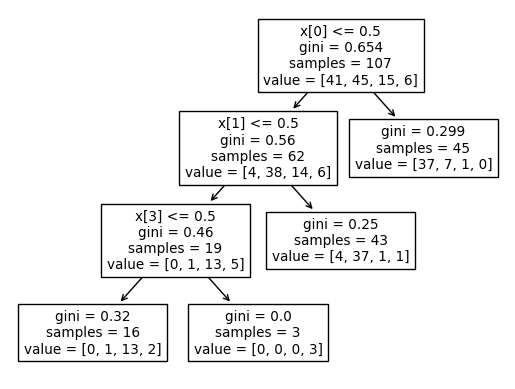

In [13]:
# plot tree
tree.plot_tree(walking_clf)

In [14]:
# variable max depth
gscv = GridSearchCV(estimator = tree.DecisionTreeClassifier(random_state=0), param_grid={'max_depth': range(1,20)}, verbose = 4, return_train_score = True)
gscv.fit(wlk_train,gait_train)

var_train_accuracy = gscv.score(wlk_train,gait_train)
var_test_accuracy = gscv.score(wlk_test,gait_test)

print("Variable Depth Train Accuracy: ", var_train_accuracy)
print("Variable Depth Test Accuracy: ", var_test_accuracy)
print(gscv.best_params_)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV 1/5] END ...max_depth=1;, score=(train=0.718, test=0.636) total time=   0.0s
[CV 2/5] END ...max_depth=1;, score=(train=0.682, test=0.773) total time=   0.0s
[CV 3/5] END ...max_depth=1;, score=(train=0.698, test=0.714) total time=   0.0s
[CV 4/5] END ...max_depth=1;, score=(train=0.733, test=0.571) total time=   0.0s
[CV 5/5] END ...max_depth=1;, score=(train=0.674, test=0.810) total time=   0.0s
[CV 1/5] END ...max_depth=2;, score=(train=0.847, test=0.682) total time=   0.0s
[CV 2/5] END ...max_depth=2;, score=(train=0.788, test=0.909) total time=   0.0s
[CV 3/5] END ...max_depth=2;, score=(train=0.814, test=0.810) total time=   0.0s
[CV 4/5] END ...max_depth=2;, score=(train=0.837, test=0.714) total time=   0.0s
[CV 5/5] END ...max_depth=2;, score=(train=0.779, test=0.952) total time=   0.0s
[CV 1/5] END ...max_depth=3;, score=(train=0.871, test=0.727) total time=   0.0s
[CV 2/5] END ...max_depth=3;, score=(train=0.812

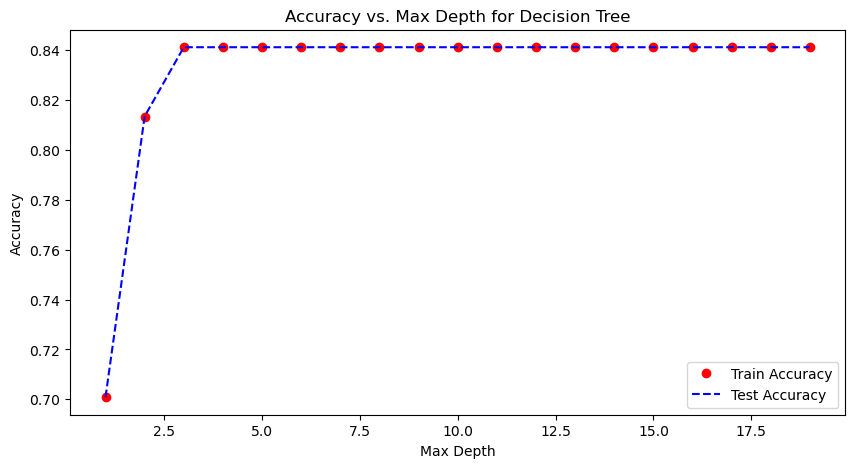

In [17]:
# plot accuracy vs n_estimators
mean_test_score = gscv.cv_results_['mean_test_score']
mean_train_score = gscv.cv_results_['mean_train_score']
max_depths = [params['max_depth'] for params in gscv.cv_results_['params']]

# Plotting the scores as a function of max_depth
plt.figure(figsize=(10, 5))
plt.plot(max_depths, mean_train_score, 'ro' ,label='Train Accuracy')
plt.plot(max_depths, mean_test_score, 'b--',label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Max Depth for Decision Tree')
plt.legend()

In [26]:
# set up data, filter for Wlkg data
# set up data, filter for Wlkg data
new_task = task.drop('Unnamed: 0', axis='columns')
new_task = task.drop('Sitng', axis='columns')
new_accel = accelerometer.drop('Unnamed: 0', axis='columns')
df = pd.concat([new_task, new_accel], axis=1)
df_new = df.dropna()

df_walk = df_new.filter(regex='Wlkg$', axis=1)

accel_col_names = []
for col in df_walk.columns:
  if col in new_accel:
    if 'Wlkg' in col:
      accel_col_names.append(col)


x = df_walk[accel_col_names]
y = df_walk['Wlkg']

accel_train, accel_test, wlk_train, wlk_test = train_test_split(x, y, test_size=0.2, random_state=0)

# vary depth
gscv = GridSearchCV(estimator = tree.DecisionTreeClassifier(random_state=0), param_grid={'max_depth': range(1,10)}, verbose = 4, return_train_score = True)
gscv.fit(accel_train, wlk_train)
train_accuracy = gscv.score(accel_train,wlk_train)
test_accuracy = gscv.score(accel_test,wlk_test)
print('train accuracy:', train_accuracy)
print('test accuracy:', test_accuracy)
print(gscv.best_params_)



Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...max_depth=1;, score=(train=0.663, test=0.571) total time=   0.0s
[CV 2/5] END ...max_depth=1;, score=(train=0.675, test=0.381) total time=   0.0s
[CV 3/5] END ...max_depth=1;, score=(train=0.614, test=0.571) total time=   0.0s
[CV 4/5] END ...max_depth=1;, score=(train=0.590, test=0.476) total time=   0.0s
[CV 5/5] END ...max_depth=1;, score=(train=0.643, test=0.500) total time=   0.0s
[CV 1/5] END ...max_depth=2;, score=(train=0.735, test=0.524) total time=   0.0s
[CV 2/5] END ...max_depth=2;, score=(train=0.759, test=0.429) total time=   0.0s
[CV 3/5] END ...max_depth=2;, score=(train=0.699, test=0.524) total time=   0.0s
[CV 4/5] END ...max_depth=2;, score=(train=0.663, test=0.381) total time=   0.0s
[CV 5/5] END ...max_depth=2;, score=(train=0.750, test=0.600) total time=   0.0s
[CV 1/5] END ...max_depth=3;, score=(train=0.855, test=0.571) total time=   0.0s
[CV 2/5] END ...max_depth=3;, score=(train=0.867,

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


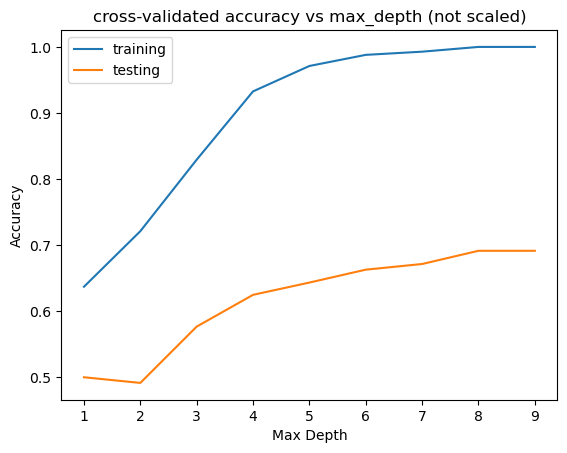

In [28]:
# visualize accuracy vs depth
plt.plot(gscv.cv_results_['param_max_depth'].data,gscv.cv_results_['mean_train_score'],label='training')
plt.plot(gscv.cv_results_['param_max_depth'].data,gscv.cv_results_['mean_test_score'],label='testing')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('cross-validated accuracy vs max_depth (not scaled)')
plt.legend()

In [31]:
# vary leaf nodes
# Grid Search Model
gscv = GridSearchCV(estimator = tree.DecisionTreeClassifier(random_state=0), param_grid={'max_leaf_nodes': range(1,50)}, verbose = 4, return_train_score = True)
gscv.fit(accel_train, wlk_train)

# score
train_accuracy = gscv.score(accel_train,wlk_train)
test_accuracy = gscv.score(accel_test,wlk_test)
print('train accuracy:', train_accuracy)
print('test accuracy:', test_accuracy)
print(gscv.best_params_)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END ..max_leaf_nodes=1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END ..max_leaf_nodes=1;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END ..max_leaf_nodes=1;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END ..max_leaf_nodes=1;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END ..max_leaf_nodes=1;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END max_leaf_nodes=2;, score=(train=0.663, test=0.571) total time=   0.0s
[CV 2/5] END max_leaf_nodes=2;, score=(train=0.675, test=0.381) total time=   0.0s
[CV 3/5] END max_leaf_nodes=2;, score=(train=0.614, test=0.571) total time=   0.0s
[CV 4/5] END max_leaf_nodes=2;, score=(train=0.590, test=0.476) total time=   0.0s
[CV 5/5] END max_leaf_nodes=2;, score=(train=0.643, test=0.500) total time=   0.0s
[CV 1/5] END max_leaf_nodes=3;, score=(train=0.711, test=0.667) total time=   0.0s
[CV 2/5] END max_leaf_nodes=3;, sco

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 5/5] END max_leaf_nodes=14;, score=(train=0.964, test=0.550) total time=   0.0s
[CV 1/5] END max_leaf_nodes=15;, score=(train=1.000, test=0.619) total time=   0.0s
[CV 2/5] END max_leaf_nodes=15;, score=(train=0.976, test=0.667) total time=   0.0s
[CV 3/5] END max_leaf_nodes=15;, score=(train=0.988, test=0.619) total time=   0.0s
[CV 4/5] END max_leaf_nodes=15;, score=(train=1.000, test=0.667) total time=   0.0s
[CV 5/5] END max_leaf_nodes=15;, score=(train=0.976, test=0.550) total time=   0.0s
[CV 1/5] END max_leaf_nodes=16;, score=(train=1.000, test=0.619) total time=   0.0s
[CV 2/5] END max_leaf_nodes=16;, score=(train=0.988, test=0.667) total time=   0.0s
[CV 3/5] END max_leaf_nodes=16;, score=(train=1.000, test=0.619) total time=   0.0s
[CV 4/5] END max_leaf_nodes=16;, score=(train=1.000, test=0.667) total time=   0.0s
[CV 5/5] END max_leaf_nodes=16;, score=(train=0.988, test=0.550) total time=   0.0s
[CV 1/5] END max_leaf_nodes=17;, score=(train=1.000, test=0.619) total time=

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 245.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", li

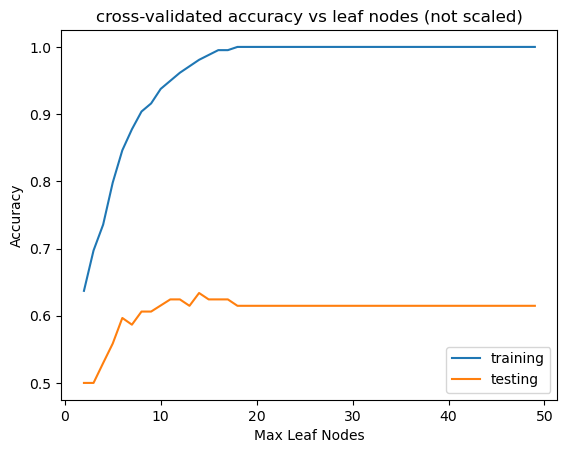

In [32]:
# visualize accuracy vs leaf nodes
plt.plot(gscv.cv_results_['param_max_leaf_nodes'].data,gscv.cv_results_['mean_train_score'],label='training')
plt.plot(gscv.cv_results_['param_max_leaf_nodes'].data,gscv.cv_results_['mean_test_score'],label='testing')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Accuracy')
plt.title('cross-validated accuracy vs leaf nodes (not scaled)')
plt.legend()

In [35]:
# random forest classifier
gscv = GridSearchCV(estimator = RandomForestClassifier(random_state = 0), param_grid={'max_depth': range(1,15,2), 'n_estimators': range(1,50,5)}, verbose = 4, return_train_score=True)
gscv.fit(accel_train, wlk_train)
train_accuracy = gscv.score(accel_train,wlk_train)
test_accuracy = gscv.score(accel_test,wlk_test)
print('train accuracy:', train_accuracy)
print('test accuracy:', test_accuracy)
print(gscv.best_params_)


Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END max_depth=1, n_estimators=1;, score=(train=0.554, test=0.571) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=1;, score=(train=0.627, test=0.429) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=1;, score=(train=0.614, test=0.524) total time=   0.0s
[CV 4/5] END max_depth=1, n_estimators=1;, score=(train=0.482, test=0.429) total time=   0.0s
[CV 5/5] END max_depth=1, n_estimators=1;, score=(train=0.607, test=0.600) total time=   0.0s
[CV 1/5] END max_depth=1, n_estimators=6;, score=(train=0.651, test=0.571) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=6;, score=(train=0.687, test=0.571) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=6;, score=(train=0.663, test=0.619) total time=   0.0s
[CV 4/5] END max_depth=1, n_estimators=6;, score=(train=0.614, test=0.667) total time=   0.0s
[CV 5/5] END max_depth=1, n_estimators=6;, score=(train=0.667, test=0.600) total time=   0.0

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END max_depth=1, n_estimators=26;, score=(train=0.711, test=0.619) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=26;, score=(train=0.699, test=0.524) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=26;, score=(train=0.651, test=0.571) total time=   0.0s
[CV 4/5] END max_depth=1, n_estimators=26;, score=(train=0.675, test=0.762) total time=   0.0s
[CV 5/5] END max_depth=1, n_estimators=26;, score=(train=0.679, test=0.650) total time=   0.0s
[CV 1/5] END max_depth=1, n_estimators=31;, score=(train=0.675, test=0.619) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=31;, score=(train=0.699, test=0.524) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=31;, score=(train=0.663, test=0.619) total time=   0.0s
[CV 4/5] END max_depth=1, n_estimators=31;, score=(train=0.663, test=0.762) total time=   0.0s
[CV 5/5] END max_depth=1, n_estimators=31;, score=(train=0.679, test=0.650) total time=   0.0s
[CV 1/5] END max_depth=1, n_estimators=36;, score=

Text(0.5, 1.0, 'cross-validated accuracy vs n estimators - testing')

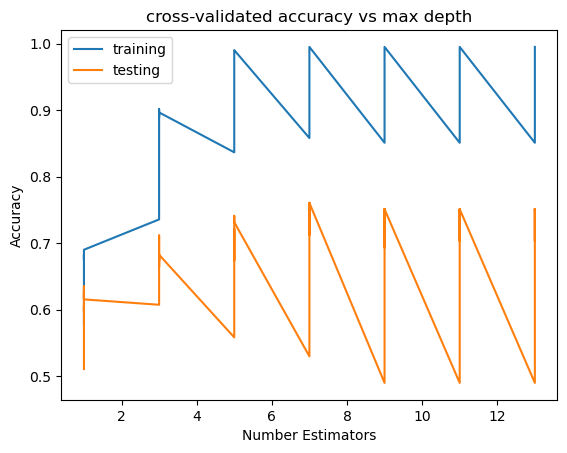

<Figure size 640x480 with 0 Axes>

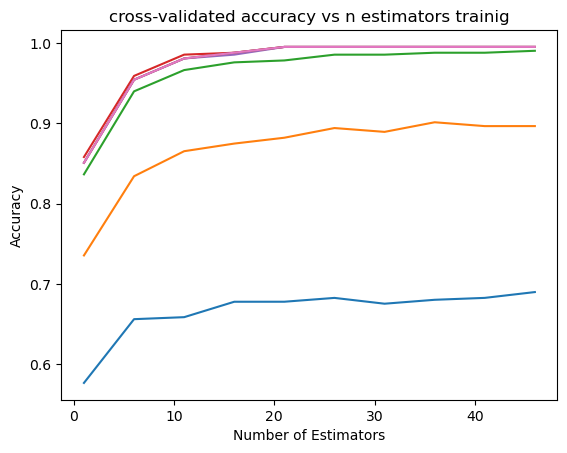

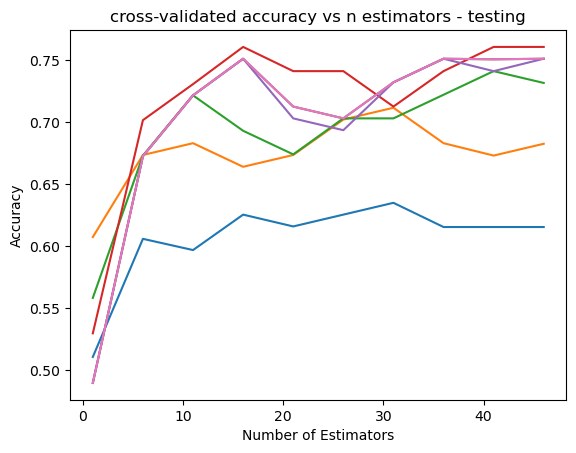

In [43]:
# visualize results

# max depth visualize
plt.plot(gscv.cv_results_['param_max_depth'].data,gscv.cv_results_['mean_train_score'],label='training')
plt.plot(gscv.cv_results_['param_max_depth'].data,gscv.cv_results_['mean_test_score'],label='testing')
plt.xlabel('Number Estimators')
plt.ylabel('Accuracy')
plt.title('cross-validated accuracy vs max depth')
plt.legend()

# n estimators visualize
plt.figure()

data_test = gscv.cv_results_['mean_test_score'].reshape(7,10)
data_train = gscv.cv_results_['mean_train_score'].reshape(7,10)
xvals = gscv.cv_results_['param_n_estimators'].data.reshape(7,10)[0,:]
yvals = gscv.cv_results_['param_max_depth'].data.reshape(7,10)[:,0]

# plot
plt.figure()
plt.plot(xvals,data_train.T,label='Train')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('cross-validated accuracy vs n estimators trainig')

plt.figure()
plt.plot(xvals,data_test.T,label='Test')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('cross-validated accuracy vs n estimators - testing')

Text(0.5, 1.0, 'Number of Estimators vs Max Depth - Test')

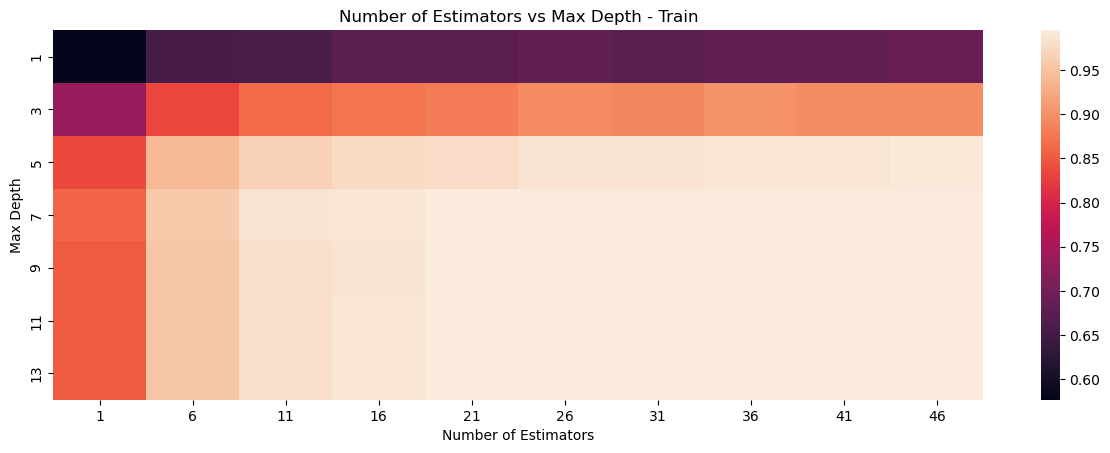

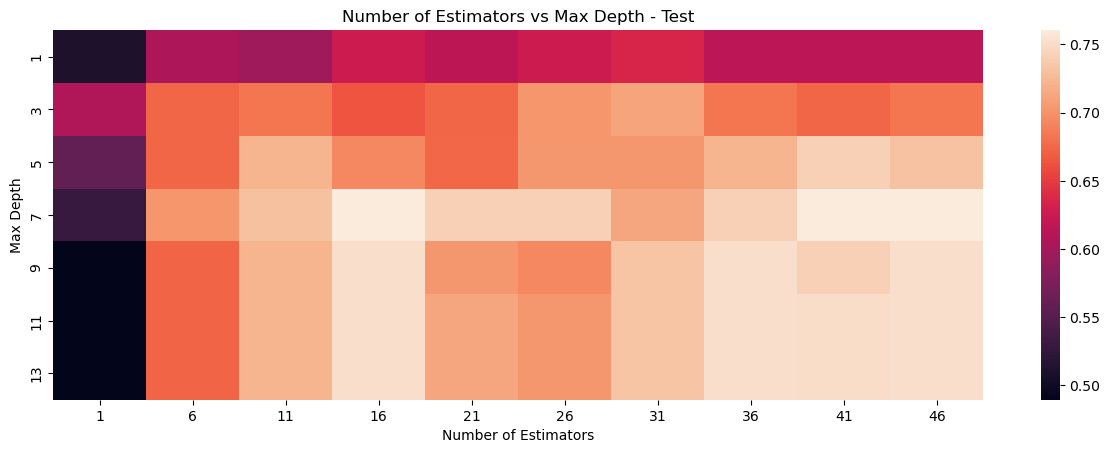

In [44]:
# heatmap visualization
# training visualize
plt.figure().set_figwidth(15)
sns.heatmap(data=gscv.cv_results_['mean_train_score'].reshape(7,10),xticklabels=xvals,yticklabels=yvals)
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.title('Number of Estimators vs Max Depth - Train')

# testing visualize
plt.figure().set_figwidth(15)
sns.heatmap(data=gscv.cv_results_['mean_test_score'].reshape(7,10),xticklabels=xvals,yticklabels=yvals)
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.title('Number of Estimators vs Max Depth - Test')

In [52]:
# using random forest with max depth 7 and n estimators 41
rfclf = RandomForestClassifier(random_state=0,max_depth=7,n_estimators= 41)

rfclf.fit(accel_train,wlk_train)

train_accuracy = rfclf.score(accel_train,wlk_train)
test_accuracy = rfclf.score(accel_test,wlk_test)

print('train accuracy:', train_accuracy)
print('test accuracy:', test_accuracy)

train accuracy: 1.0
test accuracy: 0.8846153846153846


In [51]:
# using random forest with max depth 7 and n estimators 16
rfclf = RandomForestClassifier(random_state=0,max_depth=7,n_estimators= 16)

rfclf.fit(accel_train,wlk_train)

train_accuracy = rfclf.score(accel_train,wlk_train)
test_accuracy = rfclf.score(accel_test,wlk_test)

print('train accuracy:', train_accuracy)
print('test accuracy:', test_accuracy)

train accuracy: 1.0
test accuracy: 0.9230769230769231


In [49]:
# gradient boosting classifier
accel_train, accel_test, wlk_train, wlk_test = train_test_split(x, y, test_size=0.2, random_state=0)

gscv = GridSearchCV(estimator = GradientBoostingClassifier(random_state=0,learning_rate=0.1),param_grid={'max_depth':range(1,15,2),'n_estimators':range(1,50,5)},verbose=4,return_train_score=True)
gscv.fit(accel_train,wlk_train)

train_accuracy = gscv.score(accel_train,wlk_train)
test_accuracy = gscv.score(accel_test,wlk_test)

print('train accuracy:', train_accuracy)
print('test accuracy:', test_accuracy)

print(gscv.best_params_)


Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END max_depth=1, n_estimators=1;, score=(train=0.675, test=0.524) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=1;, score=(train=0.663, test=0.333) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=1;, score=(train=0.651, test=0.571) total time=   0.0s
[CV 4/5] END max_depth=1, n_estimators=1;, score=(train=0.602, test=0.619) total time=   0.0s
[CV 5/5] END max_depth=1, n_estimators=1;, score=(train=0.655, test=0.450) total time=   0.0s
[CV 1/5] END max_depth=1, n_estimators=6;, score=(train=0.711, test=0.571) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=6;, score=(train=0.711, test=0.476) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=6;, score=(train=0.687, test=0.571) total time=   0.0s
[CV 4/5] END max_depth=1, n_estimators=6;, score=(train=0.675, test=0.667) total time=   0.0s
[CV 5/5] END max_depth=1, n_estimators=6;, score=(train=0.690, test=0.450) total time=   0.0

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END max_depth=1, n_estimators=16;, score=(train=0.855, test=0.667) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=16;, score=(train=0.819, test=0.571) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=16;, score=(train=0.795, test=0.667) total time=   0.0s
[CV 4/5] END max_depth=1, n_estimators=16;, score=(train=0.867, test=0.714) total time=   0.0s
[CV 5/5] END max_depth=1, n_estimators=16;, score=(train=0.833, test=0.600) total time=   0.0s
[CV 1/5] END max_depth=1, n_estimators=21;, score=(train=0.892, test=0.714) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=21;, score=(train=0.855, test=0.429) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=21;, score=(train=0.843, test=0.762) total time=   0.0s
[CV 4/5] END max_depth=1, n_estimators=21;, score=(train=0.892, test=0.714) total time=   0.0s
[CV 5/5] END max_depth=1, n_estimators=21;, score=(train=0.881, test=0.600) total time=   0.0s
[CV 1/5] END max_depth=1, n_estimators=26;, score=

Text(0.5, 1.0, 'Number of Estimators vs Max Depth - Test')

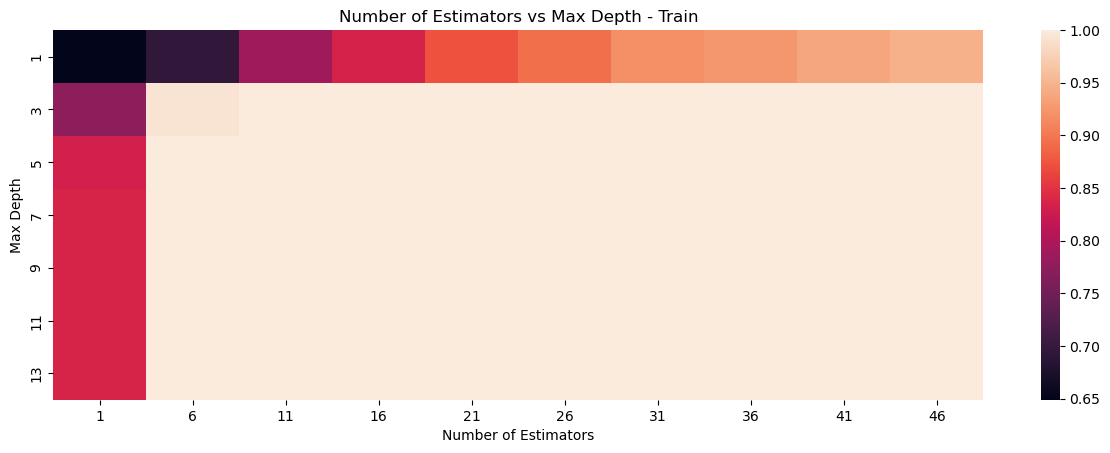

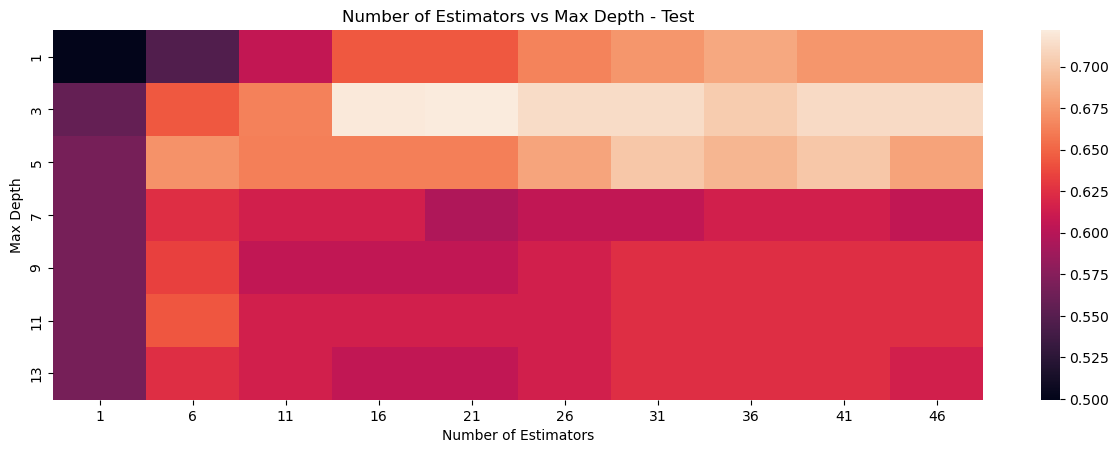

In [50]:
# Gradient Boosting Visualization

# set up data
data_train = gscv.cv_results_['mean_train_score'].reshape(7,10)
data_test = gscv.cv_results_['mean_test_score'].reshape(7,10)
xvals = gscv.cv_results_['param_n_estimators'].data.reshape(7,10)[0,:]
yvals = gscv.cv_results_['param_max_depth'].data.reshape(7,10)[:,0]

# training visualize
plt.figure().set_figwidth(15)
sns.heatmap(data=gscv.cv_results_['mean_train_score'].reshape(7,10),xticklabels=xvals,yticklabels=yvals)
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.title('Number of Estimators vs Max Depth - Train')

# testing visualize
plt.figure().set_figwidth(15)
sns.heatmap(data=gscv.cv_results_['mean_test_score'].reshape(7,10),xticklabels=xvals,yticklabels=yvals)
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.title('Number of Estimators vs Max Depth - Test')


In [53]:
# using gradient boosting with max depth 3 and n estimators 21
rfclf = GradientBoostingClassifier(random_state=0,max_depth=3,n_estimators= 21)

rfclf.fit(accel_train,wlk_train)

train_accuracy = rfclf.score(accel_train,wlk_train)
test_accuracy = rfclf.score(accel_test,wlk_test)

print('train accuracy:', train_accuracy)
print('test accuracy:', test_accuracy)

train accuracy: 1.0
test accuracy: 0.8461538461538461


In [54]:
# using gradient boosting with max depth 3 and n estimators 16
rfclf = GradientBoostingClassifier(random_state=0,max_depth=3,n_estimators= 16)

rfclf.fit(accel_train,wlk_train)

train_accuracy = rfclf.score(accel_train,wlk_train)
test_accuracy = rfclf.score(accel_test,wlk_test)

print('train accuracy:', train_accuracy)
print('test accuracy:', test_accuracy)

train accuracy: 1.0
test accuracy: 0.8461538461538461


In [71]:
# prepare data

new_subject = subject.drop('Unnamed: 0', axis='columns')
new_task = task.drop(['Sitng'], axis='columns')

df = pd.concat([new_task,new_subject], axis = 1)
df_new = df.dropna()
x = df_new[['Drnkg', 'Drwg', 'Fldg', 'FtnL', 'FtnR', 'NtsBts', 'RamL', 'RamR', 'Sheets', 'SitStand', 'Stndg', 'Typg', 'Wlkg', 'WlkgCnt']]
y = df_new['Global Bradykinesia']

# split data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0, stratify = y)

In [72]:
# use random forest

gscv = GridSearchCV(estimator = RandomForestClassifier(random_state=0), param_grid={'max_depth':range(1,15,2), 'n_estimators': range(1,50,5)}, verbose=4, return_train_score=True)
gscv.fit(x_train, y_train)

train_accuracy=gscv.score(x_train, y_train)
test_accuracy=gscv.score(x_test,y_test)

print('train accuracy: ', train_accuracy)
print('test accuracy: ', test_accuracy)
print(gscv.best_params_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END max_depth=1, n_estimators=1;, score=(train=0.627, test=0.667) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=1;, score=(train=0.651, test=0.571) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=1;, score=(train=0.614, test=0.714) total time=   0.0s
[CV 4/5] END max_depth=1, n_estimators=1;, score=(train=0.651, test=0.571) total time=   0.0s
[CV 5/5] END max_depth=1, n_estimators=1;, score=(train=0.631, test=0.650) total time=   0.0s
[CV 1/5] END max_depth=1, n_estimators=6;, score=(train=0.675, test=0.714) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=6;, score=(train=0.699, test=0.619) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=6;, score=(train=0.651, test=0.667) total time=   0.0s
[CV 4/5] END max_depth=1, n_estimators=6;, score=(train=0.675, test=0.619) total time=   0.0s
[CV 5/5] END max_depth=1, n_estimators=6;, score=(train=0.690, test=0.600) total time=   0.0

Text(0.5, 1.0, 'Number of Estimators vs Max Depth - Test')

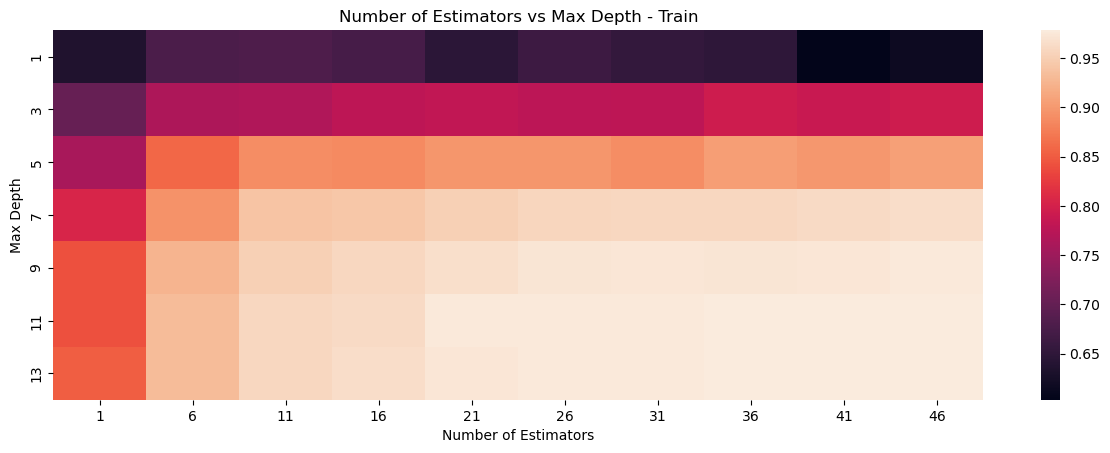

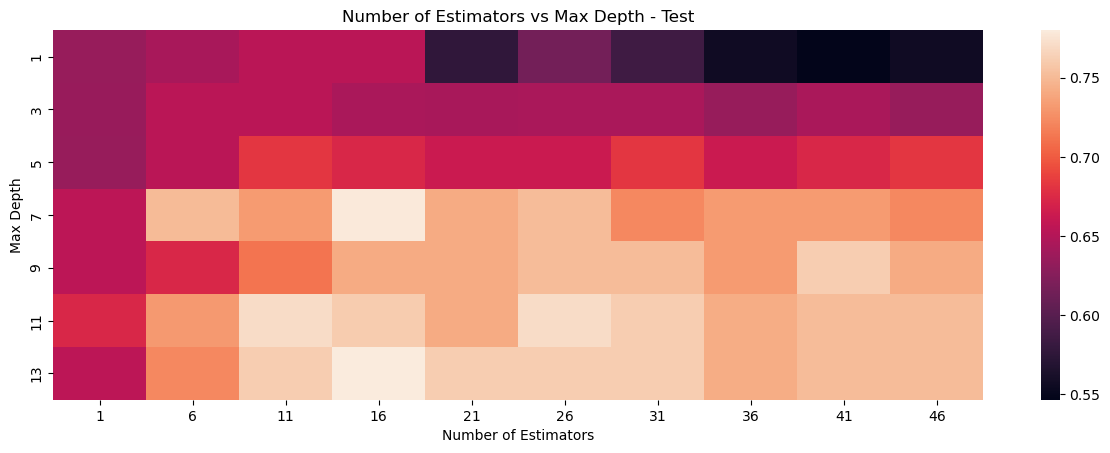

In [73]:
# visualize data

# Random Forest  Visualization
xvals = gscv.cv_results_['param_n_estimators'].data.reshape(7,10)[0,:]
yvals = gscv.cv_results_['param_max_depth'].data.reshape(7,10)[:,0]

# training visualize
plt.figure().set_figwidth(15)
sns.heatmap(data=gscv.cv_results_['mean_train_score'].reshape(7,10),xticklabels=xvals,yticklabels=yvals)
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.title('Number of Estimators vs Max Depth - Train')

# testing visualize
plt.figure().set_figwidth(15)
sns.heatmap(data=gscv.cv_results_['mean_test_score'].reshape(7,10),xticklabels=xvals,yticklabels=yvals)
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.title('Number of Estimators vs Max Depth - Test')



In [74]:
# random forest with max depth 13 and n estimators 16
rfclf = RandomForestClassifier(random_state=0, n_estimators = 16, max_depth= 13)

rfclf.fit(x_train, y_train)

train_accuracy=rfclf.score(x_train, y_train)
test_accuracy=rfclf.score(x_test,y_test)

print("train accuracy: ", train_accuracy)
print("test accuracy: ", test_accuracy)

train accuracy:  0.9519230769230769
test accuracy:  0.7307692307692307


In [75]:
# random forest with max depth 7 and n estimators 16
rfclf = RandomForestClassifier(random_state=0, n_estimators = 16, max_depth= 7)

rfclf.fit(x_train, y_train)

train_accuracy=rfclf.score(x_train, y_train)
test_accuracy=rfclf.score(x_test,y_test)

print("train accuracy: ", train_accuracy)
print("test accuracy: ", test_accuracy)

train accuracy:  0.9134615384615384
test accuracy:  0.6923076923076923


In [76]:
# gradient boost
gscv = GridSearchCV(estimator = GradientBoostingClassifier(random_state=0, learning_rate=0.1), param_grid={'max_depth':range(1,15,2), 'n_estimators': range(1,50,5)}, verbose = 4, return_train_score=True)

gscv.fit(x_train, y_train)

train_accuracy=gscv.score(x_train, y_train)
test_accuracy=gscv.score(x_test,y_test)

print("train accuracy: ", train_accuracy)
print("test accuracy: ", test_accuracy)
print(gscv.best_params_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END max_depth=1, n_estimators=1;, score=(train=0.530, test=0.524) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=1;, score=(train=0.530, test=0.524) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=1;, score=(train=0.530, test=0.524) total time=   0.0s
[CV 4/5] END max_depth=1, n_estimators=1;, score=(train=0.530, test=0.524) total time=   0.0s
[CV 5/5] END max_depth=1, n_estimators=1;, score=(train=0.524, test=0.550) total time=   0.0s
[CV 1/5] END max_depth=1, n_estimators=6;, score=(train=0.687, test=0.714) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=6;, score=(train=0.723, test=0.619) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=6;, score=(train=0.687, test=0.714) total time=   0.0s
[CV 4/5] END max_depth=1, n_estimators=6;, score=(train=0.711, test=0.667) total time=   0.0s
[CV 5/5] END max_depth=1, n_estimators=6;, score=(train=0.690, test=0.600) total time=   0.0

Text(0.5, 1.0, 'Number of Estimators vs Max Depth - Test')

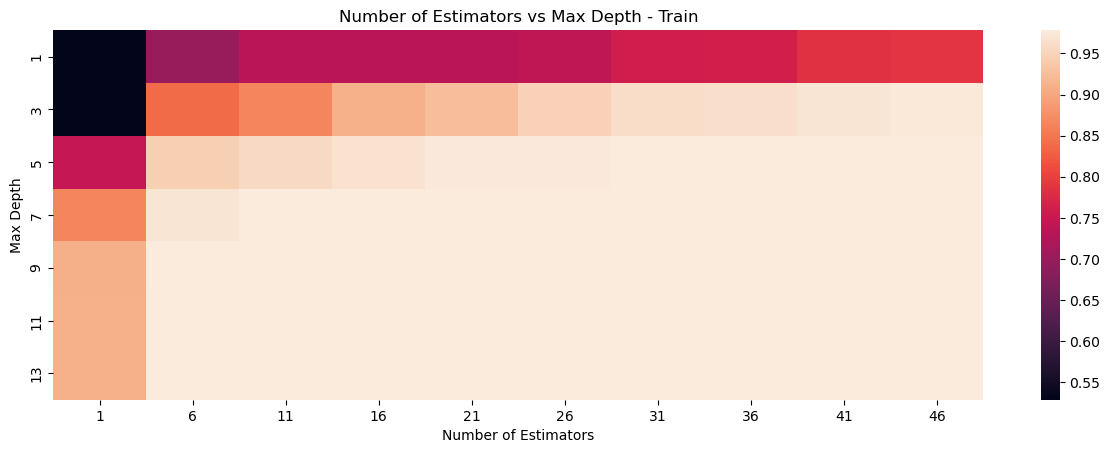

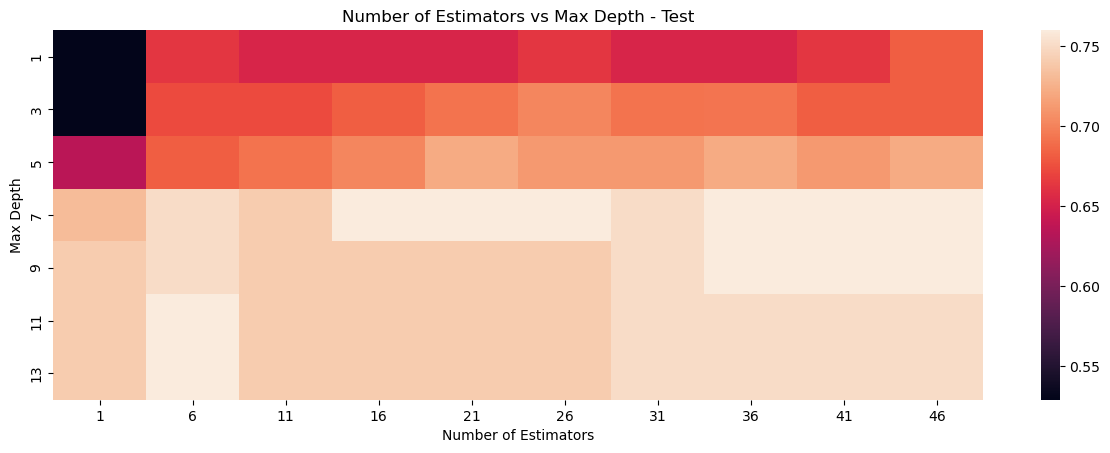

In [62]:
# training visualize
plt.figure().set_figwidth(15)
sns.heatmap(data=gscv.cv_results_['mean_train_score'].reshape(7,10),xticklabels=xvals,yticklabels=yvals)
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.title('Number of Estimators vs Max Depth - Train')

# testing visualize
xvals = gscv.cv_results_['param_n_estimators'].data.reshape(7,10)[0,:]
yvals = gscv.cv_results_['param_max_depth'].data.reshape(7,10)[:,0]
plt.figure().set_figwidth(15)
sns.heatmap(data=gscv.cv_results_['mean_test_score'].reshape(7,10),xticklabels=xvals,yticklabels=yvals)
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.title('Number of Estimators vs Max Depth - Test')


In [77]:
# gradient boosting with max depth 7 and n estimators 16
rfclf = GradientBoostingClassifier(random_state=0, n_estimators = 16, max_depth= 7)

rfclf.fit(x_train, y_train)

train_accuracy=rfclf.score(x_train, y_train)
test_accuracy=rfclf.score(x_test,y_test)

print("train accuracy: ", train_accuracy)
print("test accuracy: ", test_accuracy)

train accuracy:  0.9711538461538461
test accuracy:  0.7692307692307693


In [78]:
# gradient boosting with max depth 7 and n estimators 21
rfclf = GradientBoostingClassifier(random_state=0, n_estimators = 21, max_depth= 7)

rfclf.fit(x_train, y_train)

train_accuracy=rfclf.score(x_train, y_train)
test_accuracy=rfclf.score(x_test,y_test)

print("train accuracy: ", train_accuracy)
print("test accuracy: ", test_accuracy)

train accuracy:  0.9711538461538461
test accuracy:  0.7692307692307693


In [84]:
# using accelerometer data
new_accel = accelerometer.drop(['Unnamed: 0'], axis='columns')

df = pd.concat([new_subject,new_accel], axis = 1)
df_new = df.dropna()

col_names = []
for i in df_new.columns:
    if i in new_accel:
        col_names.append(i)
        
x = df_new[col_names]
y = df_new['Global Bradykinesia']

# split data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0, stratify = y)

In [85]:
# random forest
gscv = GridSearchCV(estimator = RandomForestClassifier(random_state=0), param_grid={'max_depth':range(1,15,2), 'n_estimators': range(1,50,5)}, verbose=4, return_train_score=True)
gscv.fit(x_train, y_train)

train_accuracy=gscv.score(x_train, y_train)
test_accuracy=gscv.score(x_test,y_test)

print('train accuracy: ', train_accuracy)
print('test accuracy: ', test_accuracy)
print(gscv.best_params_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END max_depth=1, n_estimators=1;, score=(train=0.447, test=0.409) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=1;, score=(train=0.671, test=0.409) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=1;, score=(train=0.628, test=0.429) total time=   0.0s
[CV 4/5] END max_depth=1, n_estimators=1;, score=(train=0.640, test=0.476) total time=   0.0s
[CV 5/5] END max_depth=1, n_estimators=1;, score=(train=0.616, test=0.571) total time=   0.0s
[CV 1/5] END max_depth=1, n_estimators=6;, score=(train=0.729, test=0.455) total time=   0.0s
[CV 2/5] END max_depth=1, n_estimators=6;, score=(train=0.729, test=0.455) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=6;, score=(train=0.779, test=0.619) total time=   0.0s
[CV 4/5] END max_depth=1, n_estimators=6;, score=(train=0.651, test=0.429) total time=   0.0s
[CV 5/5] END max_depth=1, n_estimators=6;, score=(train=0.709, test=0.714) total time=   0.0

Text(0.5, 1.0, 'Number of Estimators vs Max Depth - Test')

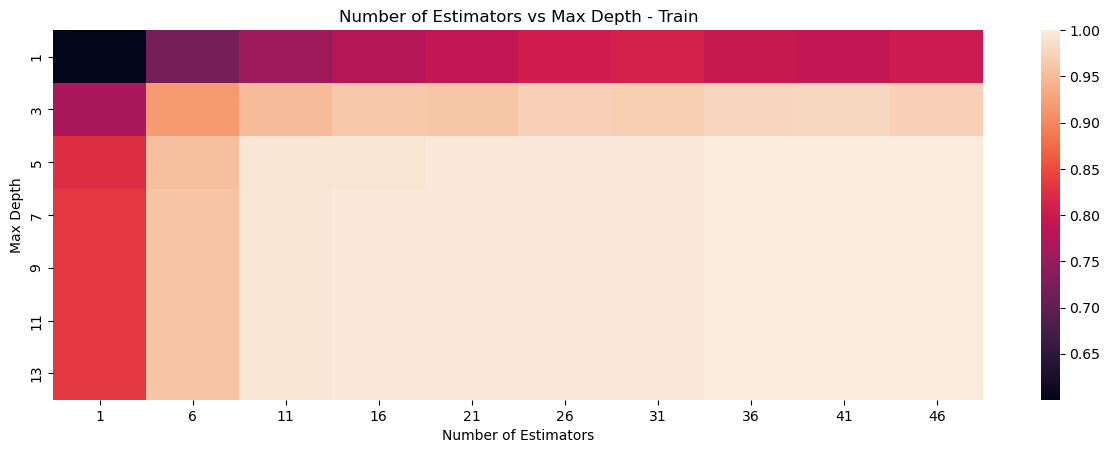

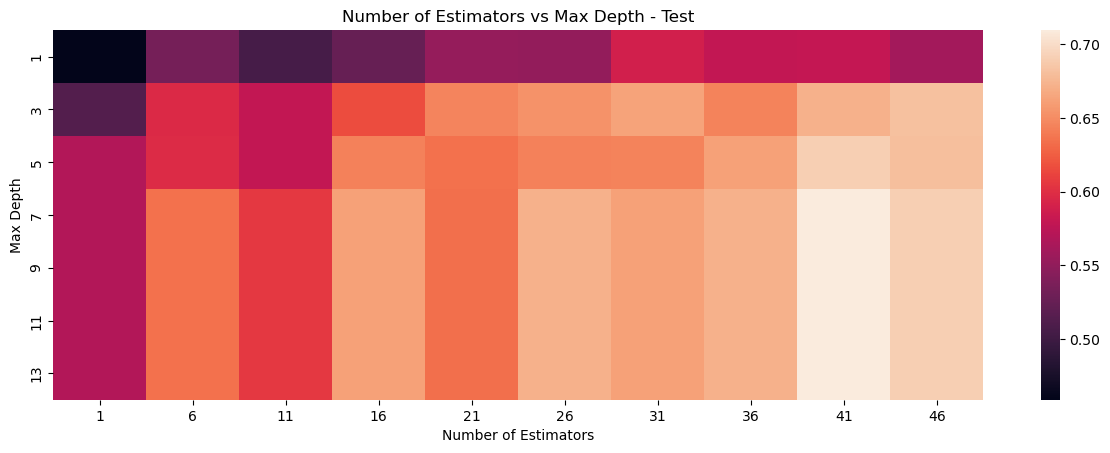

In [68]:
# visualize it
xvals = gscv.cv_results_['param_n_estimators'].data.reshape(7,10)[0,:]
yvals = gscv.cv_results_['param_max_depth'].data.reshape(7,10)[:,0]

# training visualize
plt.figure().set_figwidth(15)
sns.heatmap(data=gscv.cv_results_['mean_train_score'].reshape(7,10),xticklabels=xvals,yticklabels=yvals)
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.title('Number of Estimators vs Max Depth - Train')

# testing visualize
plt.figure().set_figwidth(15)
sns.heatmap(data=gscv.cv_results_['mean_test_score'].reshape(7,10),xticklabels=xvals,yticklabels=yvals)
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.title('Number of Estimators vs Max Depth - Test')


In [82]:
# random forest with max depth 7 and n estimators 41
rfclf = RandomForestClassifier(random_state=0, n_estimators = 16, max_depth= 41)

rfclf.fit(x_train, y_train)

train_accuracy=rfclf.score(x_train, y_train)
test_accuracy=rfclf.score(x_test,y_test)

print("train accuracy: ", train_accuracy)
print("test accuracy: ", test_accuracy)

train accuracy:  1.0
test accuracy:  0.6296296296296297


In [86]:
# gradient boost
gscv = GridSearchCV(estimator = GradientBoostingClassifier(random_state=0, learning_rate=0.1), param_grid={'max_depth':range(1,15,2), 'n_estimators': range(1,50,5)}, verbose = 4, return_train_score=True)

gscv.fit(x_train, y_train)

train_accuracy=gscv.score(x_train, y_train)
test_accuracy=gscv.score(x_test,y_test)

print("train accuracy: ", train_accuracy)
print("test accuracy: ", test_accuracy)
print(gscv.best_params_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END max_depth=1, n_estimators=1;, score=(train=0.518, test=0.500) total time=   0.1s
[CV 2/5] END max_depth=1, n_estimators=1;, score=(train=0.518, test=0.500) total time=   0.0s
[CV 3/5] END max_depth=1, n_estimators=1;, score=(train=0.570, test=0.619) total time=   0.0s
[CV 4/5] END max_depth=1, n_estimators=1;, score=(train=0.628, test=0.476) total time=   0.0s
[CV 5/5] END max_depth=1, n_estimators=1;, score=(train=0.512, test=0.524) total time=   0.0s
[CV 1/5] END max_depth=1, n_estimators=6;, score=(train=0.800, test=0.727) total time=   0.1s
[CV 2/5] END max_depth=1, n_estimators=6;, score=(train=0.788, test=0.545) total time=   0.1s
[CV 3/5] END max_depth=1, n_estimators=6;, score=(train=0.849, test=0.714) total time=   0.1s
[CV 4/5] END max_depth=1, n_estimators=6;, score=(train=0.849, test=0.524) total time=   0.1s
[CV 5/5] END max_depth=1, n_estimators=6;, score=(train=0.791, test=0.619) total time=   0.1

Text(0.5, 1.0, 'Number of Estimators vs Max Depth - Test')

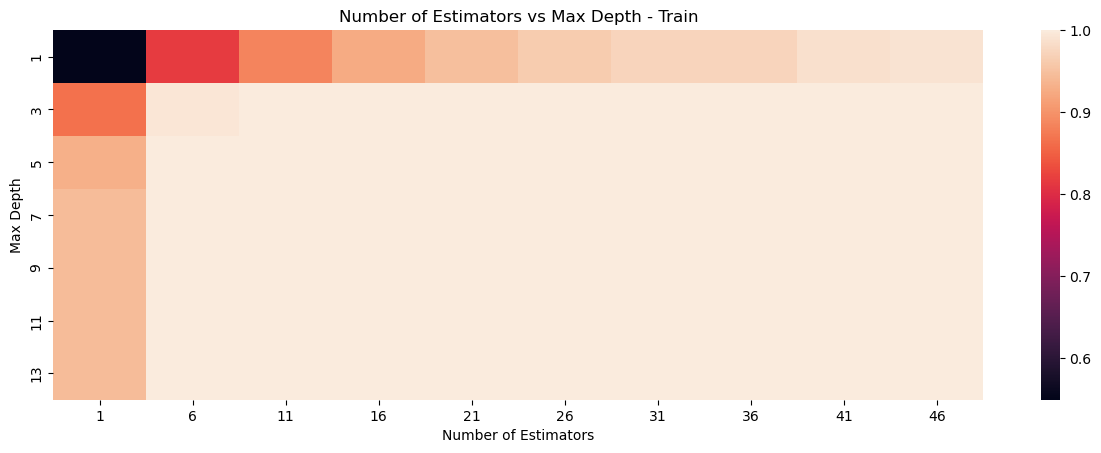

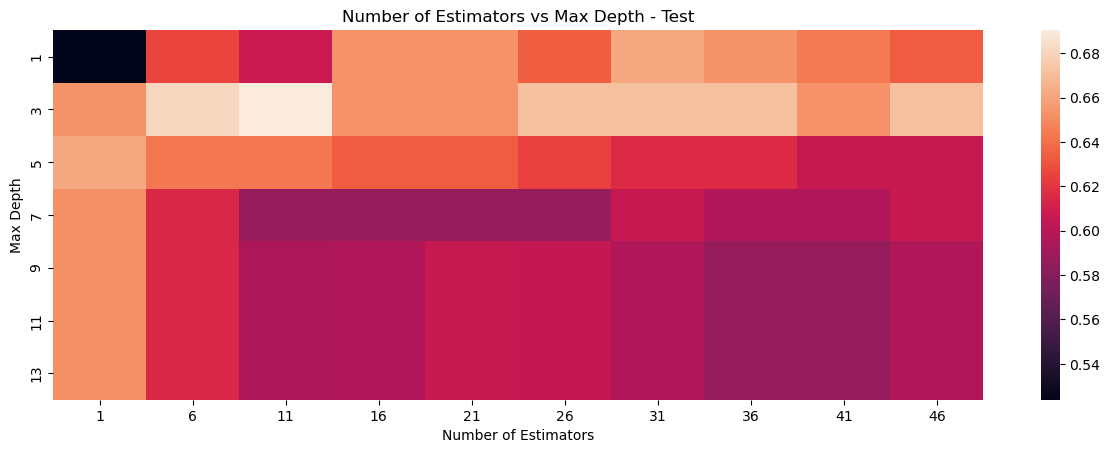

In [87]:
# visualize test
xvals = gscv.cv_results_['param_n_estimators'].data.reshape(7,10)[0,:]
yvals = gscv.cv_results_['param_max_depth'].data.reshape(7,10)[:,0]

# training visualize
plt.figure().set_figwidth(15)
sns.heatmap(data=gscv.cv_results_['mean_train_score'].reshape(7,10),xticklabels=xvals,yticklabels=yvals)
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.title('Number of Estimators vs Max Depth - Train')

# testing visualize
plt.figure().set_figwidth(15)
sns.heatmap(data=gscv.cv_results_['mean_test_score'].reshape(7,10),xticklabels=xvals,yticklabels=yvals)
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.title('Number of Estimators vs Max Depth - Test')

In [88]:
# gradient boosting classifier max depth 3 n estimators 11

gradient = GradientBoostingClassifier(random_state=0, learning_rate=0.1, max_depth= 3, n_estimators=11)
gradient.fit(x_train, y_train)
train_score = gradient.score(x_train, y_train)
test_score = gradient.score(x_test,y_test)

print("training score: ", train_score)
print("testing score: ", test_score)

training score:  1.0
testing score:  0.7407407407407407


In [89]:
# prepare data
new_subject = subject.drop('Unnamed: 0', axis='columns')
new_task = task.drop(['Sitng'], axis='columns')

df = pd.concat([new_task,new_subject], axis = 1)
df_new = df.dropna()
x = df_new[['Drnkg', 'Drwg', 'Fldg', 'FtnL', 'FtnR', 'NtsBts', 'RamL', 'RamR', 'Sheets', 'SitStand', 'Stndg', 'Typg', 'Wlkg', 'WlkgCnt']]
y = df_new['Global Bradykinesia']

# split data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0, stratify = y)

In [92]:
# calculate sensitivity and specificity

final_gscv = GradientBoostingClassifier(random_state=0, learning_rate=0.1, max_depth=3, n_estimators=11)
final_gscv.fit(x_train, y_train)
                                        # create variables for actual output vs predicted output
g_actual = y
g_pred = final_gscv.predict(x)

# mild to severe: 2-4

# conditions for true positive, true negatives, false negatives, and false positives
tp2 = (g_actual==2) & (g_pred ==2)
tp3 = (g_actual==3) & (g_pred ==3)
tp4 = (g_actual==4) & (g_pred ==4)

tn2 = (g_actual!=2) & (g_pred !=2)
tn3 = (g_actual!=3) & (g_pred !=3)
tn4 = (g_actual!=4) & (g_pred !=4)

fn2 = (g_actual==2) & (g_pred !=2)
fn3 = (g_actual==3) & (g_pred !=3)
fn4 = (g_actual==4) & (g_pred !=4)

fp2 = (g_actual!=2) & (g_pred ==2)
fp3 = (g_actual!=3) & (g_pred ==3)
fp4 = (g_actual!=4) & (g_pred ==4)

# calculate tp, fn, fp, tn
tp = tp2.sum()+tp3.sum()+tp4.sum()
fn = fn2.sum()+fn3.sum()+fn4.sum()
fp = fp2.sum() + fp3.sum() +fp4.sum()
tn =  tn2.sum() + tn3.sum() + tn4.sum()

# confusion matrix of results
cm = np.array([[tp, fn],[fp, tn]])
print(cm)


# calculate sensitivity and specificity
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
sensitivity2 = tp2.sum()/(tp2.sum()+fn2.sum())
specificity2 = tn2.sum()/(tn2.sum()+fp2.sum())
sensitivity3 = tp3.sum()/(tp3.sum()+fn3.sum())
specificity3 = tn3.sum()/(tn3.sum()+fp3.sum())
sensitivity4 = tp4.sum()/(tp4.sum()+fn4.sum())
specificity4 = tn4.sum()/(tn4.sum()+fp4.sum())

# print results
print('Sensitivity total: %.3f' % sensitivity)
print('Specificity total: %.3f' % specificity)
print('Sensitivity mild: %.3f' % sensitivity2)
print('Specificity mild: %.3f' % specificity2)
print('Sensitivity moderate: %.3f' % sensitivity3)
print('Specificity moderate: %.3f' % specificity3)
print('Sensitivity seere: %.3f' % sensitivity4)
print('Specificity severe: %.3f' % specificity4)

[[ 49  12]
 [ 15 314]]
Sensitivity total: 0.803
Specificity total: 0.954
Sensitivity mild: 0.887
Specificity mild: 0.818
Sensitivity moderate: 0.250
Specificity moderate: 0.992
Sensitivity seere: nan
Specificity severe: 1.000


/var/folders/3y/88h70jc14nsgv71207t3cb000000gn/T/ipykernel_52589/2837489728.py:50: RuntimeWarning: invalid value encountered in scalar divide
  sensitivity4 = tp4.sum()/(tp4.sum()+fn4.sum())
